## Visualise Features Captured By CONV

In [1]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
# from vis.visualization import visualize_saliency, overlay
# from vis.utils import utils
# from keras import activations
# from vis.visualization import visualize_activation

In [4]:
# from keras_visualizer import visualizer 

In [5]:
from matplotlib import pyplot as plt
import pandas as pd

In [13]:
pc_model = tf.keras.models.load_model(
        '../combined_nn_results/refined_models/pre_trained_models/CNN/all_pc/saved_models/postcode_level_branch_approachA/0')

In [11]:
# pc_model.name= 'pCMO'

In [14]:
pc_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_postcode_6010 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6014 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6011 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6280 (InputLayer [(None, 14, 14)]     0                                            
_______________________________________________________________________________________

In [6]:
data = pd.read_pickle('../ts_data/new/6010')

In [7]:
feature_inputs = data.columns.tolist()
feature_inputs

['power',
 'day2',
 'day3',
 'day4',
 'day5',
 'day6',
 'day7',
 'wind',
 'temperature',
 'dewPoint',
 'cloudCover',
 'humidity',
 'pressure',
 'uvIndex']

In [8]:
feature_inputs[0] = 'day1'
feature_inputs

['day1',
 'day2',
 'day3',
 'day4',
 'day5',
 'day6',
 'day7',
 'wind',
 'temperature',
 'dewPoint',
 'cloudCover',
 'humidity',
 'pressure',
 'uvIndex']

Loading Model 9

In [6]:
model = tf.keras.models.load_model('../combined_nn_results/refined_models/saved_models/model9')

In [10]:
import src.CNN_architectures.temporal_conv as tcn

In [12]:
# tcn.TCN.get_config()

In [1]:
# model2 = tf.keras.models.load_model('../combined_nn_results/refined_models/pre_trained_models/grid/saved_models/grid_level_branch/0', custom_objects={"TCN_grid":tcn.TCN})

In [2]:
# model2 = tf.keras.models.load_model('../combined_nn_results/refined_models/pre_trained_models/all_pc/saved_models/postcode_level_branch_approachA/0')

In [10]:
# visualizer(model9, format='png', view=True)

In [11]:
model.summary()
# plot_model(model9, show_shapes=True)

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_postcode_6010 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6014 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6011 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6280 (InputLayer [(None, 14, 14)]     0                                            
______________________________________________________________________________________

In [12]:
# summarize filters in each convolutional layer

# summarize filter shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'cnn' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(i, layer.name, layer.output.shape, filters.shape, biases)

6 cnn1_postcode_6010 (None, 14, 32) (4, 14, 32) [ 0.01218159  0.00819196 -0.00145282 -0.01392525 -0.01250212  0.0127612
  0.01118655  0.01806916 -0.01320827 -0.00391739  0.00637672  0.00431184
 -0.0028084   0.00921785 -0.01272317 -0.00110225 -0.0075383  -0.01186624
 -0.01470442 -0.00508959  0.01125524 -0.00725618 -0.00877438 -0.00963546
  0.01303868  0.01168418  0.00514139 -0.00797686 -0.00486415  0.01932095
  0.01511545 -0.00209637]
7 cnn1_postcode_6014 (None, 14, 32) (4, 14, 32) [ 0.01105045 -0.00514959 -0.01593383 -0.02122341  0.01573423 -0.00549005
 -0.00913619  0.00709747  0.01006969  0.01332097  0.00862616  0.00717893
 -0.01272415 -0.00611596  0.00520597  0.00554419 -0.00308785 -0.00874897
 -0.01070834 -0.00019601  0.01262966  0.00127794  0.0010027  -0.01420006
 -0.01430153  0.00507879 -0.00613553  0.00783241 -0.0111634  -0.00879344
 -0.00826668 -0.00707278]
8 cnn1_postcode_6011 (None, 14, 32) (4, 14, 32) [-0.00969284 -0.00140992 -0.00399539 -0.0057942   0.00184521  0.00340662
 -

In [13]:
# redefine model to output right after the first hidden layer
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[6].output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_postcode_6010 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6014 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6011 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6280 (InputLayer [(None, 14, 14)]     0                                            
______________________________________________________________________________________________

In [14]:
from numpy import expand_dims

In [15]:
test_dic = pd.read_pickle('../combined_nn_results/refined_models/test_data_pc')
sample_data = {}

for key, val in test_dic.items():
    sample_data[key] = expand_dims(val[0], axis=0)


feature_maps = model.predict(sample_data)

In [16]:
feature_maps[0][13][13]

-0.4384052

In [17]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [18]:
len(sample_data['input_postcode_6010'][0][0])

14

In [19]:
fig = make_subplots(rows=5, cols=4, subplot_titles = feature_inputs)

row = 1
col = 1
# plot the given data
for feature_input in range(0, 14):
    f_data = []
    for t in range(0, 14):
        f_data.append(sample_data['input_postcode_6010'][0][t][feature_input])
    fig.add_trace(go.Scatter(y = f_data), row=row, col=col)
    
    if col == 4:
        row = row + 1
        col = 1
    else:
        col = col + 1
        
fig.update_layout(showlegend = False, height = 700)

In [20]:
fig = make_subplots(rows=8, cols=4, subplot_titles = ['', 'Filters'])

row = 1
col = 1
for feature in range(0, 32):
    trace_data = []
    for time in range(0, 14):
        f_map = feature_maps[0][time][feature]
        trace_data.append(f_map)
    fig.add_trace(go.Scatter(y = trace_data), row=row, col=col)
    if col == 4:
        row = row + 1
        col = 1
    else:
        col = col + 1
        
fig.update_layout(showlegend = False, height = 1000)

In [26]:
model10 = tf.keras.models.load_model('../combined_nn_results/refined_models/saved_models/model10')

In [27]:
model10.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_postcode_6010 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6014 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6011 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6280 (InputLayer [(None, 14, 14)]     0                                            
______________________________________________________________________________________

In [31]:
res = tf.keras.models.load_model('../combined_nn_results/refined_models/residual_model/grid_model')

In [32]:
res.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_postcode_6010 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6014 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6011 (InputLayer [(None, 14, 14)]     0                                            
__________________________________________________________________________________________________
input_postcode_6280 (InputLayer [(None, 14, 14)]     0                                            
_______________________________________________________________________________________

In [21]:
# test_dic = pd.read_pickle('../combined_nn_results/refined_models/test_data_pc')

In [22]:
# seed_data1 = {}
# seed_data2 = {}

# for key, val in test_dic.items():
#     seed_data1[key] = val[0]
#     seed_data2[key] = val[14]

In [23]:
# seed_data1

In [24]:
# layer_idx = utils.find_layer_idx(model9, 'dense')

In [25]:
# f, ax = plt.subplots(1, 1)


# vis_images = []
# for idx in [0, 0, 0]:
#     img = visualize_activation(model9, layer_idx, filter_indices=idx, max_iter=500)
#     vis_images.append(img)
    
# visualize grads as heatmap
# ax[0].imshow(grads, cmap='jet')

## Image TS Visualise

In [1]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import numpy as np

In [3]:
# from keras.models import Model

In [4]:
conv_model = tf.keras.models.load_model(
        '../swis_combined_nn_results/new_models/conv_2d_with_images_epochs2/0/conv_2d_with_images_epochs2')

In [5]:
conv_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_postcode (InputLayer)     [(None, 173, 192, 18 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 173, 192, 18) 0           input_postcode[0][0]             
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 173, 192, 18) 0           input_postcode[0][0]             
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 173, 192, 18) 0           input_postcode[0][0]             
_______________________________________________________________________________________

In [56]:
conv_model.layers[48].name

'conv4_7'

In [61]:
new_model_1 = tf.keras.Model(inputs=conv_model.inputs, outputs=conv_model.layers[41].output)
new_model_2 = tf.keras.Model(inputs=conv_model.inputs, outputs=conv_model.layers[42].output)
new_model_3 = tf.keras.Model(inputs=conv_model.inputs, outputs=conv_model.layers[43].output)
new_model_4 = tf.keras.Model(inputs=conv_model.inputs, outputs=conv_model.layers[44].output)
new_model_5 = tf.keras.Model(inputs=conv_model.inputs, outputs=conv_model.layers[45].output)
new_model_6 = tf.keras.Model(inputs=conv_model.inputs, outputs=conv_model.layers[46].output)
new_model_7 = tf.keras.Model(inputs=conv_model.inputs, outputs=conv_model.layers[47].output)
new_model_8 = tf.keras.Model(inputs=conv_model.inputs, outputs=conv_model.layers[48].output)

In [62]:
X = np.empty((1, *(173, 192, 18), 8))
X[0,] = np.load(f'../swis_ts_data/img_ts/train_{4882}.npy')

In [63]:
# get feature map for hidden layer
feature_maps1 = new_model_1.predict(X)
feature_maps2 = new_model_2.predict(X)
feature_maps3 = new_model_3.predict(X)
feature_maps4 = new_model_4.predict(X)
feature_maps5 = new_model_5.predict(X)
feature_maps6 = new_model_6.predict(X)
feature_maps7 = new_model_7.predict(X)
feature_maps8 = new_model_8.predict(X)

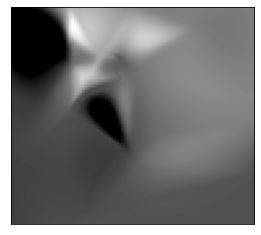

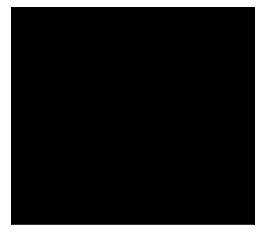

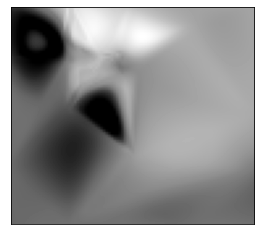

In [108]:
fig = pyplot.figure()
num = np.random.choice(64, 3)

for ix in num:
    pyplot.imshow(feature_maps1[0, :, :, ix-1], cmap='gray')
    # show the figure
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.show()

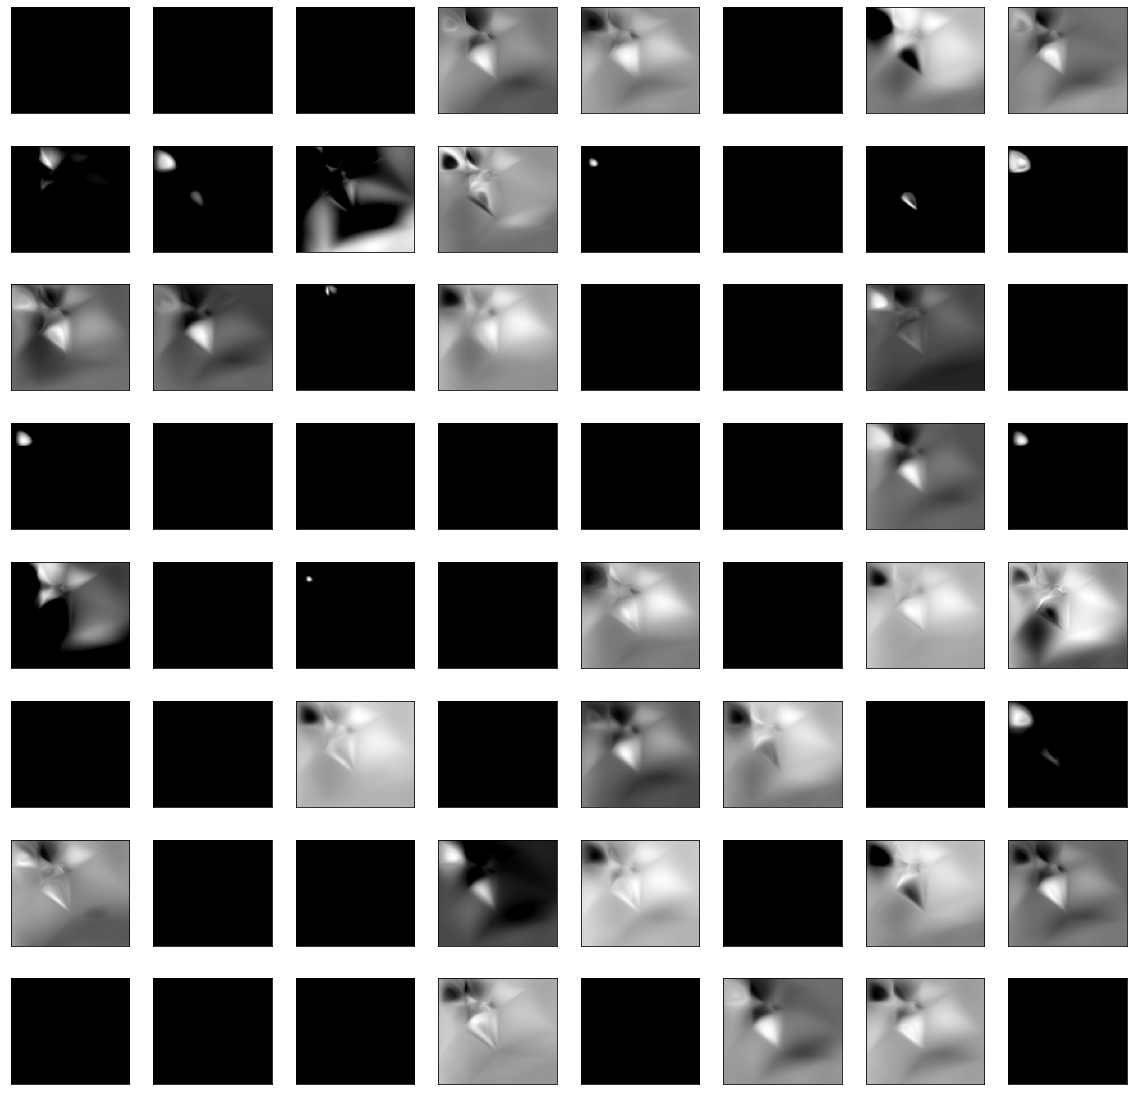

In [60]:
from matplotlib import pyplot
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
fig = pyplot.figure(figsize=(20, 20))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = fig.add_subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1

# show the figure
pyplot.show()

In [ ]:

# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()